<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
#читаем файл функцией read_csv()
data = pd.read_csv('/datasets/real_estate_data.csv')
# выводим первые пять строк на экран, чтобы изучить их
print(data.head(5))

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

Мы видим, что данные в датафрейме "склеены" в 1 строку, для разделения используется символ '\t'. Снова прочитаем файл, добавив параметр sep:

In [ ]:
#читаем файл функцией read_csv() с параметром sep='\t'
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# выводим первые пять строк на экран, чтобы убедиться,  что данные более наглядныинвертируем результат,  чтобы уместилось на экран
data.head(5).T

In [ ]:
#получим общую информацию о данных, содержащихся в датафрейме, методом Info()
data.info()
#поcтроим диаграммы для каждого столбца исходного датафрейма, это также поможет наглядно представить данные и сделать выводы об их качестве
data.hist(figsize=(15, 20));
#сделаем это методом hist() с параметром figsize=(15, 20), в конце строки поставим ";", чтобы скрыть техническую информацию

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

*Первоначальные выводы по "сырым" необработанным данным:*
- количество строк с данными 23699, соответственно, столбцы, имеющие меньше строк - имеют пропуски, которые необходимо обработать
- столбец days_exposition — сколько дней было размещено объявление (от публикации до снятия) - имеет тип данных float64,  а не int64 (кол-во дней не может быть дробным) - требует изменения
- столбец first_day_exposition — дата публикации - имеет тип данных object,  а не datetime - требует изменения
- столбец floors_total — всего этажей в доме - имеет тип данных float64,  а не int64 (в доме не может быть не целое количество этажей) - требует изменения
- столбец balcony - кол-во балконов - имеет тип данных float64,  а не int64 (количество балконов не может быть дробным) - требует изменения
- столбец is_apartment — апартаменты (булев тип) - имеет тип данных object, а не bool (квартира или является аппартаментами,  или нет) - требует изменения
- столбец parks_around3000 — число парков в радиусе 3 км - имеет тип данных float64,  а не int64 (количество парков не может быть дробным) - требует изменения
- столбец ponds_around3000 — число водоёмов в радиусе 3 км - имеет тип данных float64,  а не int64 (количество водоемов не может быть дробным) - требует изменения
- названия столбцов исходного датафрейма не требуют корректировки
- согласно данным построенных диаграмм, отрицательных значений нет ни в одном столбце - не требует изменений
- большинство построенных диаграмм имеют тип распределения данных Пуассона с ярко выраженными пиковыми значениями, после устранения недостатков в данных диаграммы будут построены повторно

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

Прежде всего,  обратим внимание на пропуски в данных. Мы можем посчитать кол-во пропусков в каждом столбце методом data.isnull().sum(), но помимо количества самих пропусков нам важно понять,  какую долю они занимают от общего количества данных,  поэтому добавим к методу / len(data)* 100, что даст нам долю пропусков в каждом столбце в процентах:

In [ ]:
data.isnull().sum()/ len(data)* 100

Начнем по порядку обрабатывать столбцы с пропусками:

In [ ]:
#проверим числовое описание данных для колонки с высотой потолков методом describe()
data['ceiling_height'].describe()

В данном столбце содержатся данные о высоте потолков, поэтому маловероятно, что минимальная высота 1м и максимальная 100м - верные значения, причем **величина среднего отклонения 1.261056 говорит о том,  что в столбце присутствуют выборсы и аномальные значения**, их  мы обработаем позже. Вероятнее всего, в появлении пропусков и аномальных значений в этом столбце виноват человеческий фактор - не все продавцы указывают высоту потолков, т.к. либо точно не знают ее, либо не могут/не хотят измерить, также возможны ошибки при вводе данных. Для заполнения пропусков в количественных данных подойдет метод медианы,  который не будет учитывать экстремальные значения.

In [ ]:
#перезапишем столбец, добавив вместо пропусков значение медианы, рассчитанное по данным этого столбца,используем метод fillna()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#проверим, остались ли пропуски в столбце 'ceiling_height'
data['ceiling_height'].isnull().sum()


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

Заполним пропуски в столбце floors_total - общее кол-во этажей. Пропусков в этом столбце всего 0,36%, поэтому они сильно не повлияют на качество данных в столбце, медианное значение столбца = 9, то есть средним значением столбца является 9-этажное здание. Заполним этим значением пропуски в столбце:

In [ ]:
#посмотрим числовое описание столбца 
display(data['floors_total'].describe())
#перезапишем столбец, добавив вместо пропусков значение медианы, рассчитанное по данным этого столбца,используем метод fillna()
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
#проверим, остались ли пропуски в столбце 'floors_total'
data['floors_total'].isnull().sum()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если мы заполняем таким способом, то нужно делать проверку, а не превышает ли этаж, на котором квартира общую этажность? Можно заменить на этаж квартиры либо оставить как есть
</div>

Следуя тем же правилам, запоним пропуски в столбцах с жилой площадью  и площадью  кухни:

In [ ]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>В  таком случае, нужно проверить чтобы жилая площадь и площадь кухни не была больше общей. Эти пропуски можно вообще не заполнять
</div>

Изучим столбец с информацией,  является ли квартира аппартаментами - is_apartment. В данном столбце 88,3% пропусков, причем их природа непонятна (возможно, люди не знают отличие апартаментов от квартир и не заполняют эту колонку). Соответственно, правильно восстановить данные невозможно, т.к. связи этого столбца с другими нет. Из оставшихся 11,7% заполненных данных только 1,8% объектов являются апартаментами (отношение True к общему кол-ву заполненных строк - узнали методом value_counts(), посчитали вручную), то есть доля аппартаментов в исследовании очень мала, а само исследование направлено на объявления о продаже квартир,  поэтому данный столбец можно не учитывать в исследовании:

In [ ]:
data['is_apartment'].value_counts()#смотрим распределение значений в столбце по их количеству

In [ ]:
#проанализируем существующие числовые данные с столбцу с количество балконов
data['balcony'].describe()

В данном столбце выбросов не наблюдается, квартиры могут быть как и без балкона, так и с 5 балконами(если это большая или коммунальная квартира). В данном случае не имеет смысла заполнять пропуски медианой, т.к. в этом случае мы "приделаем" по балкону каждой квартире, где наличие балкона не подтверждено. Вероятно, что владелец квартиры указал бы на наличие балкона при продаже, если бы он был, т.к. это довольно важная информация, соответственно, отсутствие данных о наличии балкона скорее  говорит о его отсутствии, поэтому заменим пропуски в столбце на '0'

In [ ]:
#перезапишем столбец, добавив вместо пропусков значение 0
data['balcony'] = data['balcony'].fillna(0)
#проверим, остались ли пропуски в столбце 'balcony'
data['balcony'].isnull().sum()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Пропущенные значения в столбце 'locality_name' имеют строковое значение,  заполняются пользователем,  поэтому восстановить их  представляется возможным, поэтому заполним пропуски значением "неизвестно" - 'unknown':

In [ ]:
data['locality_name'] = data['locality_name'].fillna('unknown')
data['locality_name'].isnull().sum()#проверка на отсутствие пропусков

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Эти пропуски можно вообще не заполнять
</div>

По столбцам :

- airports_nearest        23.384953
- cityCenters_nearest     23.287902
- parks_around3000        23.283683
- parks_nearest           65.909954
- ponds_around3000        23.283683
- ponds_nearest           61.559559

данные заполнялись системой автоматически по алгоритмам, поэтому заполнить данные пропуски медианой, средним или неизвестным значением не представляется возможным. Причем данные параметры являются не самыми важными при оценке стоимости квартир,  поэтому оставим пропуски в этих столбцах без изменений.
Касаемо столбца days_exposition  с количеством пропусков 13.422507% - данный столбец важен, т.к. по нему рассчитывается срок продажи, однако восстановить эти данные также невозможно, поэтому оставим пропуски без изменений.Посмотрим на результат:

In [ ]:
data.isnull().sum()/ len(data)* 100#выводим проценты пропусков в каждом столбце после обработки данных

**Изменение типов данных**

Ранее мы указали,  в каких столбах необходимо изменить тип данных. Сделаем это,  используя методы изменения данных astype() для перевода в категорию 'bool', to_datetime() для перевода данных в категорию даты, astype() с параметром notnull() - для перевода данных из  float64 в int в столбцах спропусками (без этого параметра будет ошибка):

<div class="alert alert-info">
*Комментарий для ревьюера: 
я закомментил изменение столбцов ['days_exposition'] и ['floors_total'] с параметром notnull() приводило к тому, что данных  в них заменялись на единицы, без notnull() была ошибка
Преподаватель посоветовал использовать конструкцию data['floors_total'].astype('Int64') - она должна была сохранить данные и прелбразовать их  тип,  но это не сработало
Я пока оставил тип данных как есть, т.к. это не влияет на исследование*

In [ ]:
data['is_apartment'] = data['is_apartment'].astype('bool')#переводим столбец с аппарттаментами в дначения "да" или "нет"
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')#перевод в формат даты
#data['days_exposition'] = data['days_exposition'].notnull().astype('int')#перевод из дробного числа в целое
#data['floors_total'] = data['floors_total'].notnull().astype('int')#перевод из дробного числа в целое
data['balcony'] = data['balcony'].notnull().astype('int')#перевод из дробного числа в целое
data['parks_around3000'] = data['parks_around3000'].notnull().astype('int')#перевод из дробного числа в целое
data['ponds_around3000'] = data['ponds_around3000'].notnull().astype('int')#перевод из дробного числа в целое
data.info()#проверим, верно ли изменился тип данных в нужных столбцах

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Методы fillna и astype можно применить к нескольким столбюца одновременно

	df.astype({ "col1": "float64", "col2": "int64"})
<br>Если столбцов более двух, то можно применить цикл for для автоматизации процесса
</div>

**Итак,  мы заполнили по возможности пропуски в данных и изменили по необходимости типы данных в столбцах**
Также необходимо проверить столбец с названием населенного пункта 'locality_name' на предмет неявных дубликатов - они могут быть, т.к. формат данных - строка (единственный столбец в своем роде) и он заполняется человеком. 
Для начала посмотрим кол-во уникальных вариантов с сортировкой по популярности, далее выведем список всех уникальных  названий 

In [ ]:
print(data['locality_name'].value_counts())#смотрим общеее кол-во разных названий в порядке убывания их популярности - их 365
data['locality_name'].unique()#выведем список всех уникальных значений столбца с названиями населенных пунктов


Можно заметить 2 самые заметные проблемы  - различие написания слов "посёлок" и "поселок" (проблема конкретно в буке "ё"), а также различное написание в названии поселков  - "поселок городского типа" и "городской поселок". Приведем эти значения к общему виду методом замены строковых значений str.replace(). Также могут возникать дубликаты из-за различного употребления слов поселок/деревня/село, заменим эти значения на пробелы, а потом уберем их методом str.strip().  После этого снова выведем уникальное кол-во вариантов

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')#заменяем ё на е
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')#заменяем описание поселка
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')#оставляем только название "поселок"
data['locality_name'] = data['locality_name'].str.replace('поселок','')#заменяем слово на пробел
data['locality_name'] = data['locality_name'].str.replace('деревня','')#заменяем слово на пробел
data['locality_name'] = data['locality_name'].str.replace('село','')#заменяем слово на пробел
data['locality_name'] = data['locality_name'].str.strip()#убираем лишние пробелы
data['locality_name'].value_counts()# снова смотрим общеее кол-во разных названий в порядке убывания их популярности - их стало 324

**После проделанных операций уникальных значений стало на 53 меньше (365-312), то есть мы избавились от 53 неявных дубликатов** 

<div class="alert alert-info">
комментарий для ревьюера - по идее можно все эти операции можно было заменить функцией, но я  пока не разобрался, как

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Можно сделать так
    
    for i in data['locality_name'].unique().tolist():
        data.loc[data['locality_name'] == i, 'locality_name'] = i.split()[-1] # оставляем только наименования населенного пункта
</div>

**Ранее мы замечали аномалии в данных в столбце с выcотой потолков, нужно изучить их и проверить остальные столбцы с числами на предмет аномальных значений**

Для этого применим метод describe() ко всему датафрейму:

In [ ]:
data.describe().round(1)#для простоты восприятия округлим данные до 1 знака после запятой методом round()

1. Кол-во фотографий - от 0 до 50, в среднем 9-10 - разумно;
2. Цена - устанавливается продавцом, может быть любой, менять значения нецелесообразно;
3. Общая площадь - от 12 м2 (возможно студия) до 900 м2 (большая квартира - коммунальная или этаж со свободной планировкой), в среднем 52-60 м2 - разумно;
4. Кол-во комнат - от 0 (возможно студия) до 19 (также может быть), в среднем 2 комнаты - разумно;
5. Высота потолков - от 1м (маловероятно) до 100м (тоже маловероятно) - **нужно изучить выбросы** несмотря на адекватную  медиану и среднюю;
6. Кол-во этажей - от 1 (возможно) до 60 (возможно, самое высокое здание в Санкт-Петербурге - 87 этажей), среднее 9-10 этажей,  как и в целом по стране);
7. Жилая площадь - от 2 м2 (требует внимания) до 409м2, среднее 30-34 м2 - **проверить количество минимальных значений**;
8. Этаж - от 1 до 33-го - разумно;
9. Площадь кухни - от 1,3 м2 до 112 м2,  в среднем 9-10,4м2 - разумно;
10. Кол-во балконов - от 0 до 5  - разумно;
11. Расстояние до аэропорта, центра города, до парков и водоемов заполнялось системой, сложно оценить наличие выбросов;
12. Кол-во парков и водоемов также заполняла система, однако там данные от 0 до 3 - разумно;
13. Сколько дней было размещено объявление (от публикации до снятия) - от 1 дня до 1580 дней - разумно, и, несмотря на то, что среднее и медианное значение сильно разнятся, и  стандартное отклонение почти 220 дней  - такие данные могут быть верными, но лучше их проверить, построив диаграмму (сделаем это позже)


Посмотрим на выдающиеся значения в столбце высоты потолков. Маловероятно,  что существуют квартиры с потолками меньше 2м (такую высоту можно допустить даже при нормальной принятой высоте 2,4м)и больше 10м (потолками до 10 м можно считать потолки в двухуровневых квартирах с высотой потолков 4,7-5м). Для нахождения этих строк в датафрейме воспользуемся логической индексацией

In [ ]:
display(data.loc[data['ceiling_height'] >= 10])#квартиры с высотой потолков 10м и больше
data.loc[data['ceiling_height'] < 2]#квартиры с высотой потолков меньше 2м 

Видим, что таких вариантов немного (28 строк), в основном это варианты с высотой потолков 22,6 - 32м. Можно предположить, что при вводе продавцы ошиблись - высота должна быть 2,26м и 3,2м, но если мы исправим только эти значения, в данных останутся варианты с высотой 10,3м и 14м, все остальные данные по этим вариантам заполнены (можно увидеть в датафрейме), поэтому заменим все подобные значения на медиану:

In [ ]:
#с помощью логической индексации объединим 2 условия (высота меньше 2м или больше или равно 10м) и заменим их на медиану
data.loc[(data['ceiling_height'] >= 10) | (data['ceiling_height'] < 2), 'ceiling_height'] = data['ceiling_height'].median()


In [ ]:
data['ceiling_height'].describe()#посмотрим на столбец после обработки значений
#увидим мин. значение 2м, максимальное 8,3м - больше похоже на правду. Стандартное отклонение уменьшилось на единицу - хороший показатель

Столбец жилая площадь имеет всего 2 значения 2 м2, это не сильно повлияет на результаты исследования. Также,  учитывая тот факт, что в датафрейме присутствую объекты-аппартаменты, они фактически не должны иметь жилую площадь, однако вариантов с нулевой жилой площадью нет,  оставим стобец без изменений.

In [ ]:
data.loc[data['living_area'] < 3]#квартиры с жилой площадью меньше 3 м2

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай детальнее изучим аномалии в некоторых столбцах. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
Посмотрим на аномальные значения в столбце с ценами квартир. 75% вариантов укладывается в цену до 7 млн рублей, посмотрим на распределение вариантов со стоимостью более 50 млн руб,  построив гистограмму. Из нее видно, что после отметки 200 млн цены на квартиры имеют характер выбросов. Посмотрим, сколько строк в датасете имеют параметр цены выше 200 млн  и меньше 100 т.р.

In [ ]:
#строим диграмму 
(data['last_price']/1000000).hist(grid=True, bins = 50, range=(50,800),figsize=(12, 6))
#считаем количество строк с указанными параметрами, их всего 10 
display(data[(data['last_price']<100000)|(data['last_price']>200000000)])
#перезапишем данные датасета,  оставив только строки без  выбросов
data = data[(data['last_price']>100000)&(data['last_price']<200000000)]

<div class="alert alert-info">
Проверим столбец с количеством комнат на наличие аномальных  значений, мы уже знаем,  что распределение комнат в столбце от 0 до 19

In [ ]:
data['rooms'].hist(grid=True, bins = 10, range=(0,20),figsize=(12, 6))
#считаем количество строк с количеством комнат больше 17, их  всего  7
display(data[(data['rooms']>10)])
#перезапишем данные датасета,  оставив только строки без  выбросов
data = data[data['rooms']<=10]

<div class="alert alert-info">
Проверим столбец с общей площадью на наличие аномальных  значений, для начала проверим,  изменились ли данные после удаления выбросов в предыдущих столбцах, после чего на основании данных числового описания столбца построим диаграмму

In [ ]:
display(data['total_area'].describe())
data['total_area'].hist(grid=True, bins = 50, range=(200,700),figsize=(12, 6))
#находим всего  2 строки с общей площадью более 530м2, причем они явно выглядят, как дубликат
data[(data['total_area']>530)]
#удаляем эти строки из датафрейма
data = data[(data['total_area']<530)]

<div class="alert alert-info">
По итогу работы с аномальными значениями мы удалили всего 19 строк,  что составляет  19/23699*100 = 0,08% оо общего количества данных, соответственно,  отсутствие этих строк не повлияет на результаты исследования, но улучшит репрезентативность выборки.
    
Я не пользовался кодом new_data.shape[0] / old_data.shape[0], т.к. не создавал новый датафрейм, нас в Практикуме учат по минимуму вводить новые переменные...

### Посчитайте и добавьте в таблицу новые столбцы

Для того,  чтобы добавить в таблицу столбец с ценой одного квадратного метра, необходимо стоимость квартиры last_price поделить на ее общую площадь total_area, далее это значение записать в новый столбец, назовем его price_square_meter:

In [22]:
data['price_square_meter'] = data['last_price'] / data['total_area']

Для того, чтобы добавить в таблицу столбец с днем недели даты публицации объявления, применим метод dt.weekday к столбцу с датой размещения объявления first_day_exposition , назовем его week_day:

In [29]:
data['week_day'] = data['first_day_exposition'].dt.weekday# день недели публикации объявления

По аналогии для нового столбца с месяцем публикации объявления month  и годом публикации year используем методы dt.month и dt.year:

In [30]:
data['month'] = data['first_day_exposition'].dt.month# месяц публикации объявления
data['year'] = data['first_day_exposition'].dt.year# год публикации объявления

Чтобы добавить новый стобец floor_type с данными о типе этажа, на котором находится квартира (первый, последний или другой), необходимо сопоставить данные столбцов floor (этаж нахождения квартиры) и floors_total (сколько всего этажей), присвоить каждой квартире категорию  и записать ее в новый стобец  в зависимости от условий:
- если floor = 1, то floor_type = Первый
- если floor = floors_total, то floor_type = Последний
- в остальных  случаях floor_type = Другой

In [31]:
def floortype(row):# создаем функцию для одной строки, которая будет принимать в качестве аргумента значения столбцов
    if row['floor'] == 1:#проверка первого условия
        return 'первый'
    if row['floor'] == row['floors_total']:#проверка второго условия
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floortype, axis=1)#записываем в новый столбец результат применения функции к исходному датафрейму
data[['floor', 'floors_total','floor_type']].head(15)#проверим результат в первых 15 строках датафрейма в интересующих нас столбцах

,floor,floors_total,floor_type
0,8,16.0,другой
1,1,11.0,первый
2,4,5.0,другой
3,9,14.0,другой
4,13,14.0,другой
5,5,12.0,другой
6,6,26.0,другой
7,22,24.0,другой
8,26,27.0,другой
9,7,9.0,другой


Добавим столбец с расстоянием до центра города в километрах (переведем из м в км и округлим до целых значений) - cityCenters_nearest_km:

In [32]:
#переводим метры в км - делим на 1000 и округляем значение методом round()
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

***1.Изучим следующие параметры объектов:*** 
-	общая площадь;
-	жилая площадь;
-	площадь кухни;
-	цена объекта;
-	количество комнат;
-	высота потолков;
-	этаж квартиры;
-	тип этажа квартиры («первый», «последний», «другой»);
-	общее количество этажей в доме;
-	расстояние до центра города в метрах;
-	расстояние до ближайшего аэропорта;
-	расстояние до ближайшего парка;
-	день и месяц публикации объявления.


Для наглядности все параметры, отражающие площадь, изобразим в одной системе координат, для этого каждой следующей диаграмме будем передавать координаты предыдущей. Используем метод построения диаграмм plot(), где по оси Х будет площадь (большинство значений укладывается в параметры от 0 до 150м2),  по оси Y - кол-во вариантов с соответствующей площадью. Чтобы данные не перекрывали друг друга, оставим только линии и добавим им прозрачности:

,total_area,living_area,kitchen_area,rooms
count,23680.000000,23680.000000,23680.000000,23680.000000
mean,60.081017,33.974926,10.406345,2.065118
std,33.917816,20.461650,5.521667,1.052200
min,12.000000,2.000000,1.300000,0.000000
25%,40.000000,19.000000,7.300000,1.000000
50%,52.000000,30.000000,9.100000,2.000000
75%,69.700000,41.000000,11.400000,3.000000
max,517.000000,347.500000,107.000000,10.000000


,total_area,living_area,kitchen_area,rooms
total_area,1.000000,0.874914,0.555032,0.762390
living_area,0.874914,1.000000,0.393508,0.810889
kitchen_area,0.555032,0.393508,1.000000,0.242416
rooms,0.762390,0.810889,0.242416,1.000000


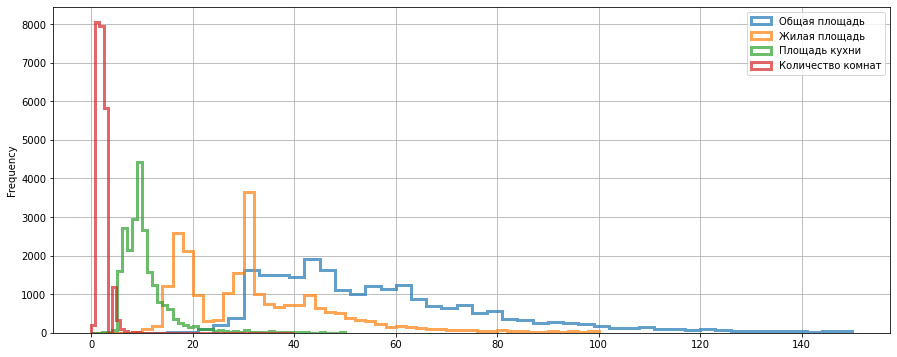

In [33]:
#строим первую диаграмму с общей площадью
ax = data.plot(kind='hist',y='total_area',histtype='step',range=(0, 150),bins=50,linewidth=3,alpha=0.7,
               label='Общая площадь',figsize=(15, 6))
#строим вторую диаграмму с жилой площадью
data.plot(kind='hist',y='living_area',histtype='step',range=(0, 100),bins=50,linewidth=3,alpha=0.7,
          label='Жилая площадь',ax=ax,grid=True,legend=True,figsize=(15, 6)) 
#строим третью диаграмму с площадью кухни
data.plot( kind='hist',y='kitchen_area',histtype='step',range=(0, 50),bins=50,linewidth=3,alpha=0.7,
          label='Площадь кухни',ax=ax,grid=True,legend=True,figsize=(15, 6))
#строим четвертую диаграмму с количеством комнат
data.plot( kind='hist',y='rooms',histtype='step',range=(0, 40),bins=50,linewidth=3,alpha=0.7,
          label='Количество комнат',ax=ax,grid=True,legend=True,figsize=(15, 6))
#также выведем числовое описание столбцов
display(data[['total_area','living_area', 'kitchen_area', 'rooms']].describe())
#также построим матрицу корреляции для трех параметров площади - общей, жилой, кухни
data[['total_area','living_area', 'kitchen_area', 'rooms']].corr()

Выводы на основе данных:
- Общая площадь квартир варьируется от 12 до 900м2, большинство вариантов имеет площадь от 30 до 75м2, макимум вариантов площадью 45м2
- Жилая площадь квартир варьируется 2 до 409 м2, большинство вариантов имеет площади от 15 до 20м2 и 25-30м2, странно,  что мало вариантов с жилой площадью 21-24м2, вероятно это обусловлено типовой застройкой: в квартирах с 0-1 комнатами жилая площадь не превышает 20м2, а если комнат уже 2 и больше - жилая площадь резко возрастает до 25-30м2
- Площадь кухни варьируется от 1,3 до 112м2, больше всего вариантов с площадью 9-10м2
- Кол-во комнат в больнинстве вариантов - 1-2, далее идет убывание - 3х-комнатных квартир меньше, квартир с комнатами больше 5 практически нет
Благодаря матрице корреляции также можно сделать вывод о наличии взаимосвязи между параметрами площади и количеством комнат, из нее следует,  что существует сильная взаимосвязь между общей площадью, жилой площадью  и количество комнат (коэффициент больше 0,75). То есть с увеличением общей площади увеличивается кол-во комнат и жилая площадь квартир. 
Также существует взаимосвязь между общей площадью и площадью  кухни (коэф-т 0,57) ,  а также жилой площадью и площадью кухни (коэф- 0,41). Меньше всего прослеживается зависимомть между количеством комнат и площадью кухни (коэф-т 0,257)

Теперь рассмотрим такой важный параметр,  как цена объекта. Согласно данным describe() большинство вариантов не превышает 7 млн, для большей точности возьмем крайний параметр range 20 млн

count        23680.0
mean       6389345.6
std        7785987.7
min         430000.0
25%        3400000.0
50%        4650000.0
75%        6782500.0
max      190870000.0
Name: last_price, dtype: float64

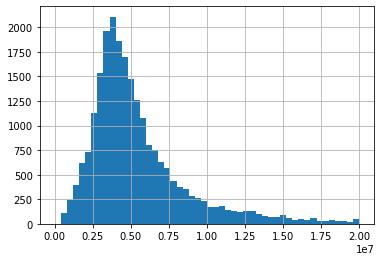

In [34]:
data['last_price'].hist(range=(0, 20000000), bins=50)#строим обычную диаграмму методом hist()
data['last_price'].describe().round(1)


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

Цена квартир варьируется от 12190р до 763 млн руб. Максимальное количество вариантов продается по цене,  близкой к медиенной  - 4,65 млн,  большое стандартное отклонение говорит о том,  что в данном столбце присутствует большое количество выбросов

Оценим гистограммы,  построенные по столбцам высота потолков и этаж квартиры:

count    23680.000000
mean         2.697490
std          0.231322
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

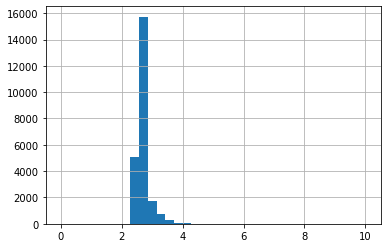

In [35]:
data['ceiling_height'].hist(range=(0, 10), bins=35)#строим обычную диаграмму методом hist()
data['ceiling_height'].describe()

Мы ранее обрабатывали данные в этом столбце,  поэтому выдающихся значений в нем нет, высота потолков варьируется от 2,2 м до 8,3м, большая часть вариантов имеют высоту потолков, приближенную к медианному (среднему) значению 2,65-2,7м

count    23680.000000
mean         5.891343
std          4.883617
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

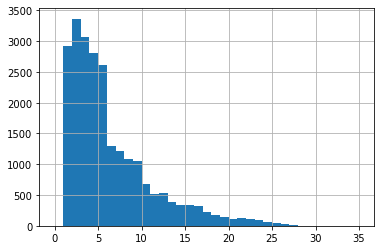

In [36]:
data['floor'].hist(range=(0, 35), bins=35)#строим обычную диаграмму методом hist()
data['floor'].describe()

Больше всего  вариантов находятся на 1-5 этажах, после 9 этажа идет довольно существенный спад, что с большой вероятностью  соответсвует большому количеству 5 и 9-этажных зданий, в которых располагаются квартиры

<AxesSubplot:>

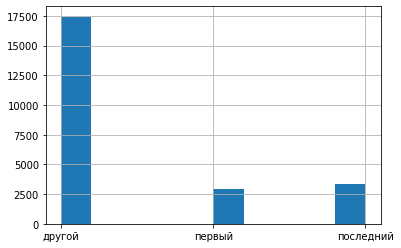

In [37]:
data['floor_type'].hist()#строим дефолтную диаграмму

Больше вариантов находятся на этажах, отличных от первого и последнего, что логично,  количество вариантов на первом и последнем этаже примерно одинаково

<AxesSubplot:>

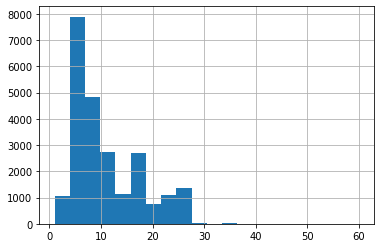

In [38]:
data['floors_total'].hist(bins=20)#с количеством корзин 20 данные более наглядны

Как мы и предполагали ранее,  больше всего домов имеют от 4 до 9 этажей (особенности домостроения в РФ),  также есть пик в данных  в районе 16-17 этажей (современное домостроение)

Столбцы с расстоянием до центра города и до аэропорта имеют схожие данные, построим диаграммы по ним в одних координатах, ьуда же добавим столбец с расстоянием до ближайшего парка

,airports_nearest,cityCenters_nearest,parks_nearest
count,18138.0,18161.0,8069.0
mean,28796.0,14201.0,491.0
std,12636.0,8607.0,342.0
min,0.0,181.0,1.0
25%,18576.0,9249.0,288.0
50%,26729.0,13107.0,454.0
75%,37284.0,16294.0,612.0
max,84869.0,65968.0,3190.0


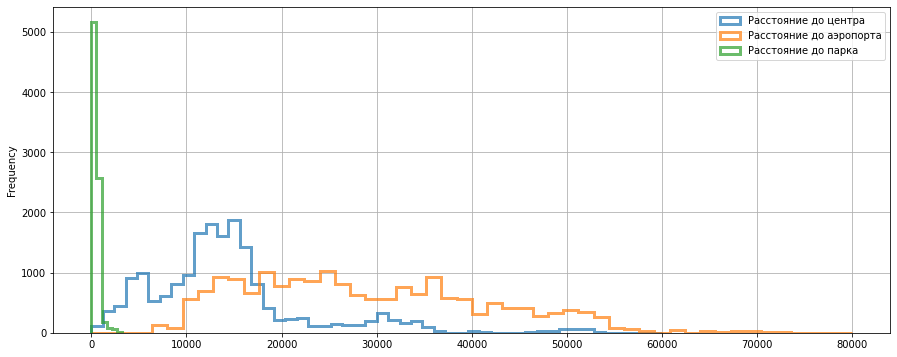

In [39]:
#строим диаграмму с расстроянием до центра города
ax = data.plot(kind='hist',y='cityCenters_nearest',histtype='step',range=(0, 60000),bins=50,linewidth=3,alpha=0.7,
               label='Расстояние до центра',figsize=(15, 6))
#строим вторую диаграмму с расстоянием до аэропорта
data.plot(kind='hist',y='airports_nearest',histtype='step',range=(0, 80000),bins=50,linewidth=3,alpha=0.7,
          label='Расстояние до аэропорта',ax=ax,grid=True,legend=True,figsize=(15, 6))
#строим третью диаграмму с расстоянием до ближайшего парка
data.plot(kind='hist',y='parks_nearest',histtype='step',range=(0, 3200),bins=6,linewidth=3,alpha=0.7,
          label='Расстояние до парка',ax=ax,grid=True,legend=True,figsize=(15, 6)) 
data[['airports_nearest','cityCenters_nearest', 'parks_nearest']].describe().round()

Расстояние до парка - не очень важный параметр,  однако большинство вариантов находятся не дальше 1 км от ближайшего парка,  максимальное расстояние согласно данным 3км 190м.

Раастояние до аэропорта - также не самы важный параметр и здесь можно заметить в целом ровное распределение вариантов на расстоянии от 12 до 40км , дальше 40км количество вариантов постепенно снижается, меньше всего вариантов на расстоянии меньше 9км и больше 55км 

Расстояние до центра - самый важный показатель из  3х перечисленных, и здесь можно заметить относительно небольшое количество вариантов в центре (до 3км), далее рост в районе 4-5км и снова спад,  самое большое кол-во вариантов находится на расстоянии 12-16км от центра, далее идет спад с небольшим скачком в районе 30км,  что уже считается пригородом Санкт-Петербурга

День и месяц публикации объявления также рассмотрим по аналогии:

,week_day,month
count,23680.000000,23680.000000
mean,2.569130,6.401014
std,1.788902,3.491496
min,0.000000,1.000000
25%,1.000000,3.000000
50%,3.000000,6.000000
75%,4.000000,10.000000
max,6.000000,12.000000


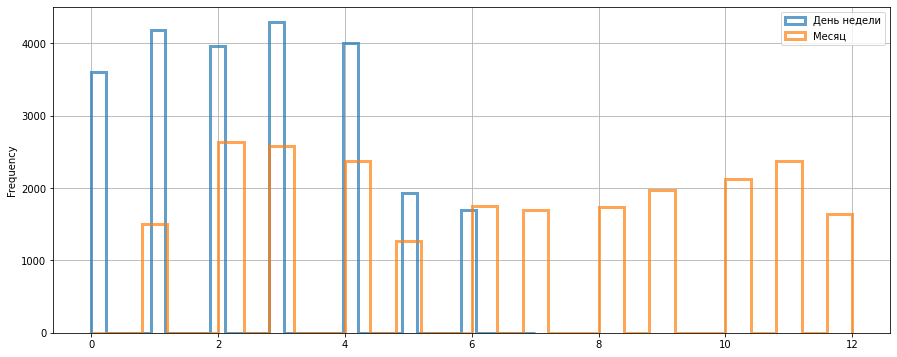

In [40]:
ax = data.plot(kind='hist',y='week_day',histtype='step',range=(0, 7),bins=30,linewidth=3,alpha=0.7,
               label='День недели',figsize=(15, 6))
data.plot(kind='hist',y='month',histtype='step',range=(0, 12),bins=30,linewidth=3,alpha=0.7,
          label='Месяц',ax=ax,grid=True,legend=True,figsize=(15, 6))
data[['week_day','month']].describe()


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Этот график нужно разделить на 2 отдельных, так как сейчас у тебя по оси х идут и дни недели и месяца
</div>

<AxesSubplot:>

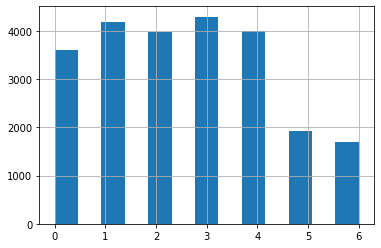

In [50]:
#построим диаграмму с данными распределения количества объявлений по дням недели
data['week_day'].hist(bins=13)

<AxesSubplot:>

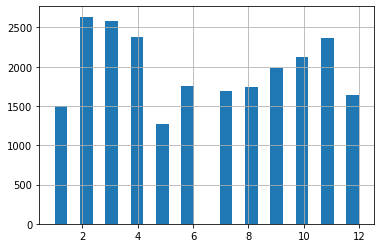

In [51]:
#построим диаграмму с данными распределения количества объявлений по месяцам
data['month'].hist(bins=24)

Согласно данным гистограмм,  больше всего обявлений размещено в будние дни - с понедельника по пятницу,  в выходные вариантов размещено примерно в 2 раза меньше,  меньше всего -  в воскресенье. 
По месяцам меньше всего объявлений размещается в весенне-летние месяцы с мая по август (меньше всего в мае), а больше всего в феврале-апреле (максимум в феврале), также большое количество размещений объявлений происходит в ноябре.  Такое распределение может быть связано с большим количеством праздничных и выходных дней в определенных месяцах,  которые  влияют на желание продавцов размещать объявления.

<div class="alert alert-info">
Диаграммы для дней недели и месяцев построил  отдельно,  вывод  оставляю прежним, он не поменялся

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Для остальных столбцов ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

***2. Изучим данные о том,  как быстро продавались квартиры - days_exposition:***

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

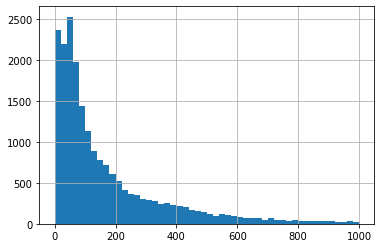

In [35]:
data['days_exposition'].hist(range=(0, 1000), bins=50)#строим обычную диаграмму методом hist()
data['days_exposition'].describe()

Изначально мы видим убывающую тенденцию стандартного распределения Пуассона, озаначающую, что большое количество вариантов продается в первые 100 дней, далее идет постепенный спад, однако большая разница между медианным (95 дней) и средним значением (181 день),  а также большое стандартное отклонение (почти 220 дней) говорит о том, что в данных присутствует большое количество выбросов,  их можно заметить, изменив масштаб представления данных:

<AxesSubplot:>

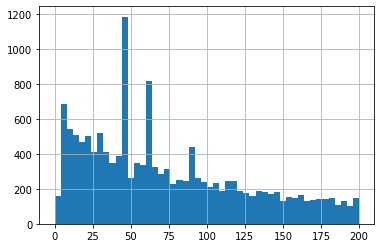

In [36]:
data['days_exposition'].hist(range=(0, 200), bins=50)

Можно заметить 3 явных выброса в районе 45, 60 и 90 дней, которые влияют на результат. Маловероятно, что подобные выбросы - просто совпадение,  возможно закрытие объявлений в эти дни (через 45, 60 и 90 дней) обусловлены спецификой работы сайтов объявлений,  которые самостоятельно снимают объявления с продажи при достижении определенного времени публикации.Эту информацию необходить уточнить у менеджера, предоставившего данные
Тем не менее, согласно числовому описанию  данных столбца можно сделать определенные выводы по данным, находящимся в границах 75% всех вариантов:
- варианты, которые сняты с продажи ранее 45 дней - вероятно были проданы очень быстро;
- варианты, присутствующие на сайте объявлений более 232 дней - можно считать аномально долгими продажами

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Здорово, что ты заметил эти всплески! Это действительно особенность функционирования системы размещения объявлений. Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

***3.Изучим факторы больше всего влияют на общую (полную) стоимость объекта***

Проверим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год)

Для этого воспользуемся методом сводных таблиц pivot_table и corr(), чтобы посмотреть взаимосвязь нужных данных:

,total_area,last_price
total_area,1.000000,0.653675
last_price,0.653675,1.000000


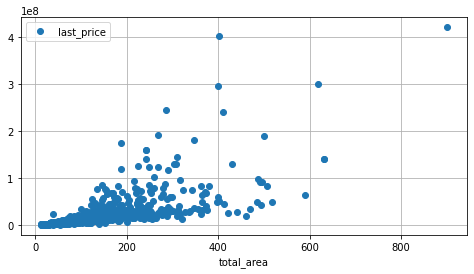

In [37]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(8, 4))#строим график зависимости цены от площади
data[['total_area', 'last_price']].corr()#построим таблицу корреляции

Коэф-т корреляции цены объекта и общей площади составляет 0,65, то есть существует довольно сильная взаимосвязь этих параметров, можно предположить, что с увеличением общей площади плавно увеличивается и цена объекта,  особенно эта связь прослеживается для объектов площадью до 300м2, далее появляется большое количество выбросов, что может говорить о том,  что объекты площадью более 300м2 имеют прочие индивидуальные характеристики, влияющие на цену

,living_area,last_price
living_area,1.000000,0.540659
last_price,0.540659,1.000000


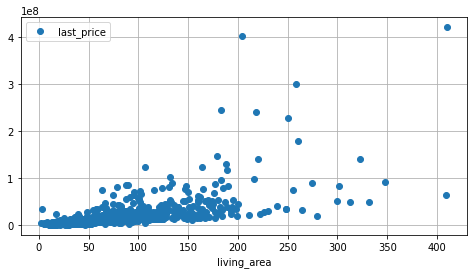

In [38]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(8, 4))#по аналогии с предыдущим столбцом
data[['living_area', 'last_price']].corr()

Коэф-т корреляции цены объекта и жилой площади составляет 0,54, что также показывает положительную взаимосвязь этих параметров, то есть с увеличением жилой площади плавно увеличивается и цена объекта,  особенно эта связь прослеживается для объектов площадью до 200м2, далее появляется большое количество выбросов, что может говорить о том,  что объекты площадью более 200м2 имеют прочие индивидуальные характеристики, влияющие на цену

,kitchen_area,last_price
kitchen_area,1.000000,0.440316
last_price,0.440316,1.000000


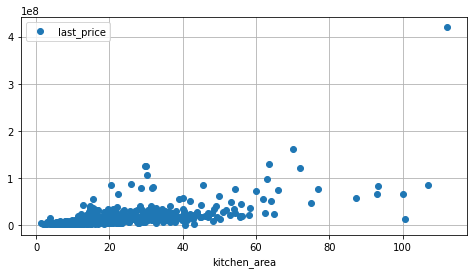

In [39]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(8, 4))
data[['kitchen_area', 'last_price']].corr()

Из исследуемых  параметров площади площадь кухни имеет наименьшую положительную взаимосвязь с ценой объкта - коэф-т корреляции 0,44. данная взамосвязь в большей степени прослеживается при площади кухни от 0 до 50м2

**Общий вывод по 3 параметрам: самое большое влияние на цену имеет параметр общей площади квартиры,  в меньшей степени - жилая площадь,  наименьнее влияние - площадь кухни**

,rooms,last_price
rooms,1.000000,0.363343
last_price,0.363343,1.000000


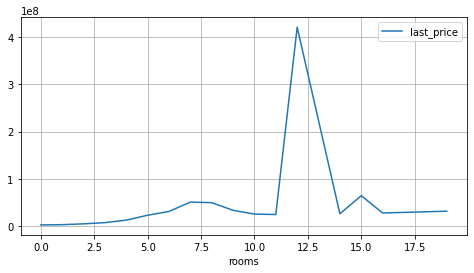

In [40]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(8, 4))
data[['rooms', 'last_price']].corr()

Взаимосвязь количества комнат и цены относительно невелика - коэф-т корреляции 0,36.  Однако есть сильный выброс по объектам с количеством комнат,  равным 12.Посмотрим на этот(и) объект(ы)

In [52]:
data.loc[data['rooms'] == 12]#находим в датасете строки, в которой количество комнат равно 12

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week_day,month,year,floor_type,cityCenters_nearest_km


Действительно, данный объект имеет очень высокую цену (420 млн) и является рекордсменом по площади (900м2 общая и 409,7м2 жилая), однако у нас нет оснований полагать,  что данный объект ненастоящий. Т.к. данный объект относится к аппартаментам,  его можно было бы исключить из данных исследования и выровнять данные,  однако такой цели заказчиком не озвучивалось, поэтому оставим данные без изменений, но сделаем пометку на будущее

<AxesSubplot:xlabel='floor_type'>

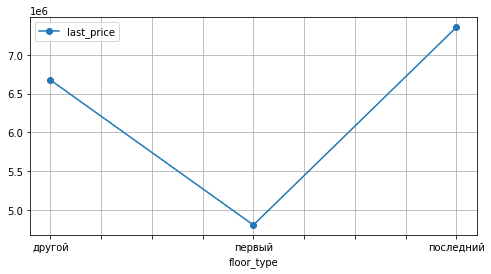

In [42]:
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, style='o-', figsize=(8, 4))

График, построенный стандартным методом, показывет, что цена квартир на последнем этаже выше всего,  далее идет любой другой и ниже всего цена квартир на первом этаже.  Данный график не показывает распределение объектов, поэтому посмторим на те же данные,построив диаграмму рассеивания: 

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

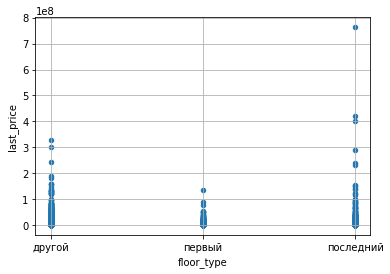

In [43]:
data.plot(x='floor_type', y='last_price', kind='scatter',grid=True)

Можно заметить,  что категория квартир на последнем этаже имеет серьезные выбросы, видимо это цены на дорогие "пентхаусы". Можем добавить функцию медианы в изначальный метод,отбросив аномальные значения, тогда график будет более информативным


<AxesSubplot:xlabel='floor_type'>

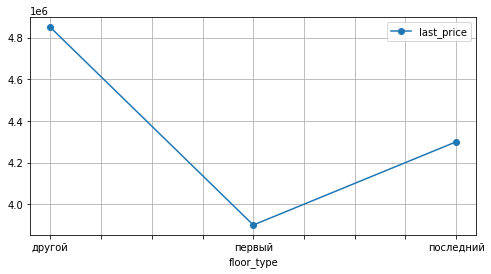

In [44]:
data.pivot_table(index='floor_type', values='last_price', aggfunc = 'median').plot(grid=True, style='o-', figsize=(8, 4))

Дороже всего квартиры на этажах, отличных от первого и последнего,  самые дешевые квартиры - на первом этаже

,week_day,month,year,last_price
week_day,1.000000,0.011496,-0.004799,0.001550
month,0.011496,1.000000,-0.269642,0.002779
year,-0.004799,-0.269642,1.000000,-0.043089
last_price,0.001550,0.002779,-0.043089,1.000000


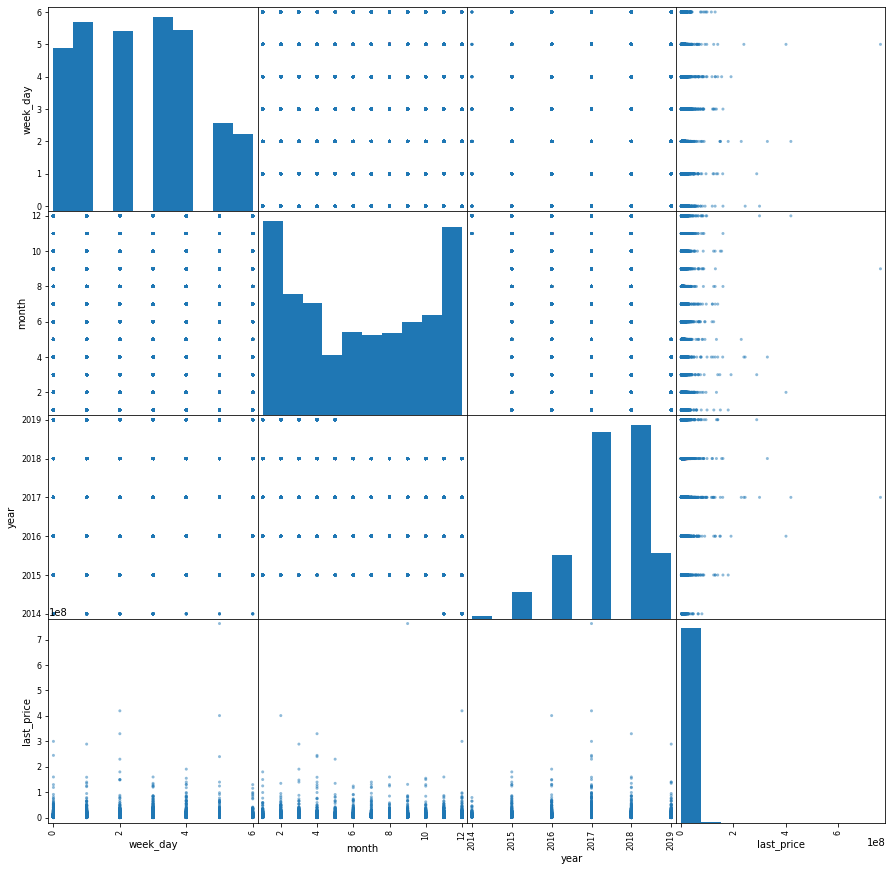

In [45]:
data_corr = data[['week_day','month', 'year','last_price']]#создадим датафрейм с 4-мя параметрами
pd.plotting.scatter_matrix(data_corr, figsize=(15, 15))#построим матрицу диаграмм рассеивания нового датафрейма
data[['week_day','month', 'year','last_price']].corr()#выведем коэ-ты корреляции параметров

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для категории этажа, дня, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану
    
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
</div>

**В данной матрице зависимость цены от дня, месяца и года размещения обявления показывает нижняя строка. Если не брать в расчет выбросы, то становится очевидно,  что цена практически никак не зависит от этих  параметров, а крайне маленькая величина коэф-тов корреляции 0.001550,  0.002779 и -0.043089	говорит скорее о наличии статистической погрешности, нежели зависимости параметров**

<div class="alert alert-info">
Проверим возможную зависимость цены квартир от дня недели, месяца и года размещения объявления, для этого построим 3 графика

<AxesSubplot:xlabel='year'>

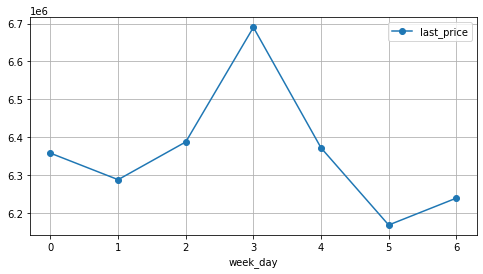

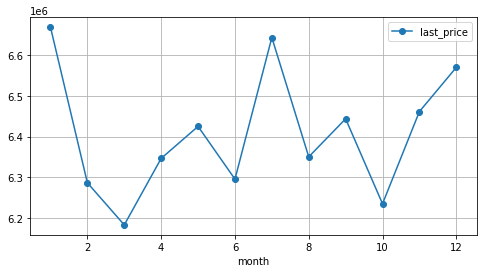

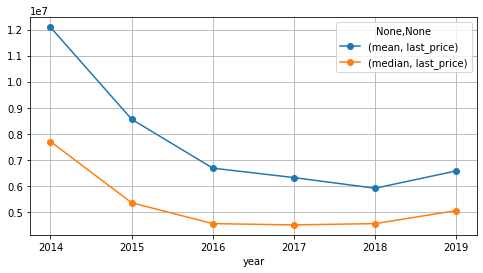

In [72]:
#зависимость цены от дня недели размещения объявления
data.pivot_table(index='week_day', values='last_price', aggfunc = 'mean').plot(grid=True, style='o-', figsize=(8, 4))
#зависимость цены от месяца размещения объявления
data.pivot_table(index='month', values='last_price', aggfunc = 'mean').plot(grid=True, style='o-', figsize=(8, 4))
#зависимость цены от года размещения объявления
data.pivot_table(index='year', values='last_price', aggfunc = ['mean','median']).plot(grid=True, style='o-', figsize=(8, 4))

***4.Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений***



Для начала выделим 10 городов с максимальным количеством объявлений комбинацией методов value_counts() и head(10)

In [46]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [47]:
#сделаем срез данных, в который поместим все строки датафрейма с интересующими нас городами
data_locality = data.query('locality_name == ["Санкт-Петербург", "Мурино", "Кудрово","Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг"]')
#сгруппируем получившийся датафрейм по городам и найдем среднюю цену квадратного метра в каждом городе, после чего отсортируем их по возрастанию
data_locality.groupby('locality_name')['price_square_meter'].mean().sort_values()

locality_name
Выборг              58141.909153
Всеволожск          68654.473986
Гатчина             68746.146763
Колпино             75424.579098
Шушары              78677.364217
Мурино              86087.512050
Парголово           90175.913458
Кудрово             95324.930544
Пушкин             103125.819291
Санкт-Петербург    114849.008794
Name: price_square_meter, dtype: float64

**Таким образом, минимальная средняя цена квадратного метра  - в городе Выборг - 58141.9р/м2, а максимальная, как и ожидалось - в Санкт-Петербурге - 114849р/м2**

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

***5.Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра***

,cityCenters_nearest_km,last_price
cityCenters_nearest_km,1.000000,-0.206995
last_price,-0.206995,1.000000


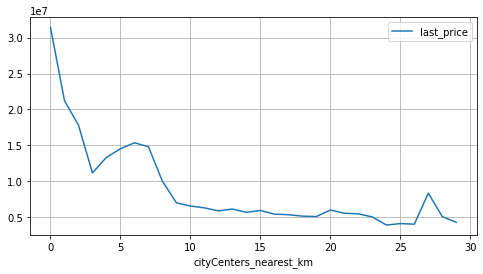

In [48]:
#Выбираем квартиры только в СПБ - data.query('locality_name == "Санкт-Петербург"')
#Делаем сводную таблицу по срезу с данными о стоимости объекта и расстояния до центра, рассчитываем среднее значение  - pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
#строим график по этим данным
data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean').plot(grid=True, figsize=(8, 4))
#Считаем коэффициент корреляции
data[['cityCenters_nearest_km', 'last_price']].corr()

Взаимосвязь параметров стоимости квартир и расстояния от центра имеет отрицательный коэ-т корреляции -0,2,  что может свидетельствовать о том, что чем дальше квартира находится от центра Санкт-Петербурга, тем она будет дешевле, этот вывод также подтверждается графиком.
Можно заметить провал графика на отметке примерно 3км от центра и пиковое значение в районе 27 км от центра, также на график могло повлиять укрупнение данных - перевод в км из м, построим 2 графика с распределением объектов в этих промежутках по изначальным данным

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

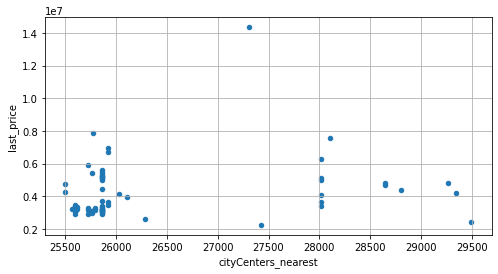

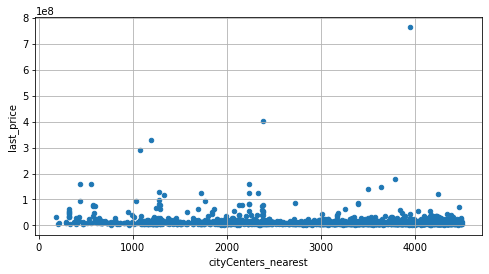

In [49]:
data.query('cityCenters_nearest_km > 25 and locality_name == "Санкт-Петербург"').plot(x='cityCenters_nearest', y='last_price', kind='scatter',grid=True, figsize=(8, 4))
data.query('cityCenters_nearest_km < 5 and locality_name == "Санкт-Петербург"').plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, figsize=(8, 4))

Как видно из  графиков, мы видим отсутствие выбросов в районе  3км от центра,  и напротив - наличие выброса в районе 27 км от центра, а также более плавное распределение вариантов, что могло повлиять на результат

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Общий вывод

**Итак, основной задачей данного исследования было установление параметров,  которые позволят построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность**

После обработки данных и проведения ряда рассчетов были установлены следующие параметры объявлений и квартир:
- Кол-во фотографий в объявлениях варьируется от 0 до 50, в среднем 9-10;
- Общая площадь квартир варьируется от 12 м2 (возможно студия) до 900 м2 (большая квартира - коммунальная или этаж со свободной планировкой), в среднем 52-60 м2;
- Жилая площадь квартир - от 2 м2 (требует внимания) до 409м2, среднее 30-34 м2;
- Площадь кухни - от 1,3 м2 до 112 м2, в среднем 9-10,4м2;
- Кол-во балконов - от 0 до 5;
- Количествово комнат варьируется от 0 (возможно студия) до 19 (также возможный вариант), в среднем в квартирах 2 комнаты;
- Высота потолков по обработанным данным - от 2 до 8,3м (среднее значение 2,65-2,7м);
- Кол-во этажей - от 1 до 60 (возможно, самое высокое здание в Санкт-Петербурге - 87 этажей), среднее 9-10 этажей, как и в целом по стране);
- Больше всего вариантов находятся на 1-5 этажах, после 9 этажа идет довольно существенный спад, что с большой вероятностью соответсвует большому количеству 5 и 9-этажных зданий, в которых располагаются квартиры, количество вариантов на первом и последнем этаже в выборке примерно одинаково;
- Расстояние до парка - большинство вариантов находятся не дальше 1 км от ближайшего парка,  максимальное расстояние согласно данным 3км 190м;
- Растояние до аэропорта - здесь можно заметить в целом ровное распределение вариантов на расстоянии от 12 до 40км , дальше 40км количество вариантов постепенно снижается, меньше всего вариантов на расстоянии меньше 9км и больше 55км;
- Расстояние до центра -  можно заметить относительно небольшое количество вариантов в центре (до 3км), далее рост в районе 4-5км и снова спад,  самое большое кол-во вариантов находится на расстоянии 12-16км от центра, далее идет спад с небольшим скачком в районе 30км,  что уже считается пригородом Санкт-Петербурга;


Были выявлены следующие закономерности:
- Существует положительная взаимосвязь между общей площадью, жилой площадью и количество комнат (коэффициент больше 0,75) в квартирах. То есть с увеличением общей площади увеличивается кол-во комнат и жилая площадь квартир. Также существует взаимосвязь между общей площадью и площадью кухни (коэф-т 0,57) , а также жилой площадью и площадью кухни (коэф- 0,41). Меньше всего прослеживается зависимомть между количеством комнат и площадью кухни (коэф-т 0,257);
- Согласно, больше всего обявлений размещено в будние дни - с понедельника по пятницу, в выходные вариантов размещено примерно в 2 раза меньше, меньше всего - в воскресенье. По месяцам меньше всего объявлений размещается в весенне-летние месяцы с мая по август (меньше всего в мае), а больше всего в феврале-апреле (максимум в феврале), также большое количество размещений объявлений происходит в ноябре. Такое распределение может быть связано с большим количеством праздничных и выходных дней в определенных месяцах, которые влияют на желание продавцов размещать объявления;
-  Большое количество вариантов продается в первые 100 дней размещения объявления, далее идет постепенный спад, однако большая разница между медианным (95 дней) и средним значением (181 день), а также большое стандартное отклонение (почти 220 дней) говорит о том, что в данных присутствует большое количество выбросов - а именно 45, 60 и 90 дней - могут быть обусловлены спецификой работы сайтов объявлений, которые самостоятельно снимают объявления с продажи при достижении определенного времени публикации


**Цена квартир варьируется от 12190р до 763 млн руб. Максимальное количество вариантов продается по цене, близкой к медиенной - 4,65 млн. Влияние на цену квартир:**
- самое большое влияние на цену имеет параметр общей площади квартиры, в меньшей степени - жилая площадь, наименьнее влияние - площадь кухни;
- взаимосвязь количества комнат и цены относительно невелика (коэф-т корреляции 0,36);
- дороже всего квартиры на этажах, отличных от первого и последнего, самые дешевые квартиры - на первом этаже;
- зависимость цены квартир от даты размещения объекта(неделя, месяц, год) не установлена;
- взаимосвязь параметров стоимости квартир и расстояния от центра г. Санкт-Петербург имеет отрицательный коэ-т корреляции -0,2, что может свидетельствовать о том, что чем дальше квартира находится от центра Санкт-Петербурга, тем она будет дешевле

Также в рамках исследования было установлено,  что минимальная средняя цена квадратного метра - в городе Выборг - 58141.9р/м2, а максимальная, как и ожидалось - в Санкт-Петербурге - 114849р/м2



<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- отбросить аномальные значения 
<br>- построить график для дня недели и месяца публикации объявления
<br>- корректно изучить зависимость цены от категории этажа и времени публикации объявления
<br>- поправить выводы там, где это необходимо
</div>


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод